In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [30]:
customers = pd.read_csv("Mall_Customers.csv")

In [31]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
features = ["Age","Annual Income (k$)", "Spending Score (1-100)"]

In [36]:
customers = customers.dropna(subset=features)

In [37]:
data = customers[features].copy()

In [38]:
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [39]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [40]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,5.009615,4.734426,6.020408
std,2.686348,2.152846,2.635053
min,1.000000,1.000000,1.000000
25%,3.067308,3.172131,4.443878
50%,4.461538,4.811475,6.000000
75%,6.961538,6.163934,8.346939
max,11.000000,11.000000,11.000000


In [41]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [42]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [43]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [44]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

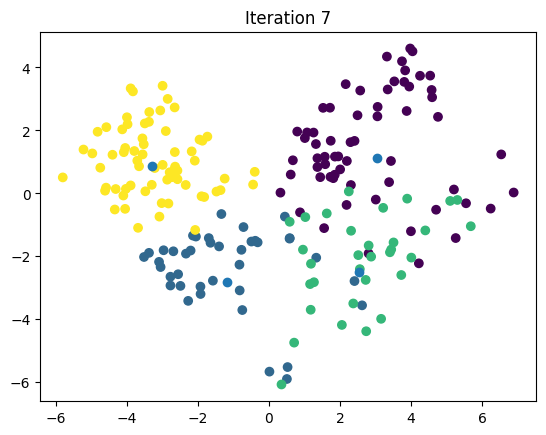

In [55]:
max_iterations = 100
k = 4

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
i = 1

while i < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, i)
    i += 1

In [52]:
centroids

,0,1,2,3
Age,3.631289,2.746667,4.285719,8.055186
Annual Income (k$),1.754578,4.203572,6.762768,3.793032
Spending Score (1-100),3.189574,8.047471,2.670691,4.667617
